In [1]:
import  numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from  sklearn.linear_model import  SGDRegressor #Stochastic Gradient Descent Regressor
from  sklearn.preprocessing import  PolynomialFeatures
import outilsReg as reg
from numpy import random as rd

Using TensorFlow backend.


In [2]:
    #matplotlib inline 
    #df = pd.DataFrame(erreurGeneralisation[0], columns=['Dist', 'RL', 'TREE', 'BG', 'MLP', 'ST'])
    #df.boxplot()

In [3]:
base=pd.read_csv("data.csv", header=0, decimal=".", index_col=0)

In [4]:
base.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.000000,16.41000,41.020000,1394.590000
2,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.000000,4.25000,127.560000,1955.950000
3,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.000000,60.87000,218.590000,6167.510000
4,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,...,225.0,1301.78,716.0,4142.56,47.0,271.93,1.318981,41.68308,306.640000,6135.400582
5,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.000000,40.05000,829.026006,9988.790000
6,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,13.26,...,2094.0,1386.46,7690.0,5091.64,454.0,300.60,134.000000,88.72000,442.950000,6867.420000
7,28700,2.60,1.60,96.57,1.47,1.10,11.17,27.41,12.76,14.42,...,110.0,372.09,288.0,974.19,144.0,487.10,17.000000,57.50000,226.630000,1890.880000
8,59459,2.45,14.20,84.87,0.40,0.63,15.31,27.93,14.78,14.60,...,608.0,997.60,2250.0,3691.79,125.0,205.10,9.000000,14.77000,439.730000,4909.260000
9,74111,2.46,0.35,97.11,1.25,0.73,16.64,35.16,20.33,8.58,...,425.0,532.66,3149.0,3946.71,206.0,258.18,8.000000,10.03000,115.310000,4747.580000
10,103590,2.62,23.14,67.60,0.92,16.35,19.88,34.55,21.62,13.12,...,2397.0,2221.81,6121.0,5673.63,1070.0,991.80,18.000000,16.68000,1544.240000,8903.930000


In [5]:
boolViolence = (base.columns == 'ViolentCrimesPerPop')
boolPred = (base.columns != 'ViolentCrimesPerPop')

In [6]:
boolViolence

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [7]:
yVar = base.loc[:, boolViolence].values

In [8]:
yVar

array([[ 41.02],
       [127.56],
       [218.59],
       ...,
       [353.83],
       [691.17],
       [918.89]])

In [9]:
XVar = base.loc[:, boolPred].values

In [10]:
XVar.shape

(2215, 141)

In [11]:
echanTrain = rd.choice([0,1],size=XVar.shape[0], replace=True, p= [0.3, 0.7])

In [12]:
#theta = rd.randn(1+XVar.shape[1])

### Phase d'entrainement


In [13]:
modele = reg.modelisation(yVar[echanTrain==1,:], XVar[echanTrain==1,:])

In [14]:
yVar[echanTrain==1,:]

array([[ 41.02],
       [218.59],
       [439.73],
       ...,
       [353.83],
       [691.17],
       [918.89]])

In [18]:
modele.fit(10)

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1528/1528 [==============================] - 1s 354us/step - loss: 2685287745975.6230
Epoch 2/20
1528/1528 [==============================] - 0s 24us/step - loss: 1903422883250.2617
Epoch 3/20
1528/1528 [==============================] - 0s 19us/step - loss: 1233633813209.1309
Epoch 4/20
1528/1528 [==============================] - 0s 19us/step - loss: 782584019447.9581
Epoch 5/20
1528/1528 [==============================] - 0s 25us/step - loss: 487708670884.8586
Epoch 6/20
1528/1528 [==============================] - 0s 27us/step - loss: 286092174298.4712
Epoch 7/20
1528/1528 [==============================] - 0s 20us/step - loss: 160774997769.3822
Epoch 8/20
1528/1528 [==============================] - 0s 25us/step - loss: 86120679220.2722
Epoch 9/20
1528/1528 [==============================] - 0s 18us/step - loss: 50492210524.4817
Epoch 10/20
1528/1528 [==============================] - 0s 32us/step - loss: 41858384654.7435
Epoch 11/20
1528/1528 [=========================

(array([585.1015953 , 612.05643531]),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False),
 <keras.callbacks.callbacks.History at 0x2b9cccb9ac8>)

In [19]:
modele.predict(XVar[echanTrain==0,:])

(array([ 6.88136451e+01,  8.63088105e+02,  1.59971421e+03,  9.76749598e+02,
         4.01223473e+02, -1.90302103e+02,  9.85690960e+02,  1.14587902e+03,
         6.44815173e+02,  1.16425318e+02,  6.99655245e+02, -8.47532094e+02,
         1.05086016e+03,  4.69806996e+02,  7.87785202e+02,  1.39806188e+03,
         1.99603313e+03,  1.20146949e+03,  3.48721978e+02,  4.64713932e+02,
         8.71805770e+02, -1.19502419e+03,  8.73652477e+02,  4.33656655e+02,
         1.75012889e+02,  1.63875763e+03, -2.73430522e+02,  5.87991337e+02,
        -2.13537352e+02,  1.82999313e+02,  8.66059947e+02,  1.08541683e+03,
         1.46738009e+03,  1.09759929e+03, -4.65767641e+02,  8.13490628e+02,
         1.09218339e+03,  4.54671771e+02, -6.57099017e+02,  1.50412300e+03,
        -1.93822793e+02,  5.46629453e+02,  1.07076792e+03,  1.17722520e+03,
         1.61021222e+02,  5.83424199e+02,  5.60912579e+02,  9.18853169e+02,
         8.18195747e+02, -2.72968629e+02,  1.95809011e+03,  7.95094883e+02,
         8.9

In [20]:
modele.evaluation(XVar[echanTrain==0,:], yVar[echanTrain==0,:])

(749698.8863365892,
 22653.294200441465,
 709256.7923060209,
 714131.9155002388,
 4658894427.626304,
 189651123.3409219)

In [21]:
modele.cross_val(10, 10)

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1358/1358 [==============================] - 1s 387us/step - loss: 49000797802405.5078
Epoch 2/20
1358/1358 [==============================] - 0s 25us/step - loss: 38678028278251.6406
Epoch 3/20
1358/1358 [==============================] - 0s 21us/step - loss: 32232413906319.6445
Epoch 4/20
1358/1358 [==============================] - 0s 24us/step - loss: 27366504488610.1211
Epoch 5/20
1358/1358 [==============================] - 0s 24us/step - loss: 19614753379444.1250
Epoch 6/20
1358/1358 [==============================] - 0s 19us/step - loss: 16171625067093.2090
Epoch 7/20
1358/1358 [==============================] - 0s 26us/step - loss: 12419720216141.6680
Epoch 8/20
1358/1358 [==============================] - 0s 27us/step - loss: 8479904578353.3906
Epoch 9/20
1358/1358 [==============================] - 0s 31us/step - loss: 5856975216097.0840
Epoch 10/20
1358/1358 [==============================] - 0s 20us/step - loss: 4764533230343.1641
Epoch 11/20
1358/1358 [========

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1372/1372 [==============================] - 1s 758us/step - loss: 13346018099773.2012
Epoch 2/20
1372/1372 [==============================] - 0s 30us/step - loss: 7458068974433.7725
Epoch 3/20
1372/1372 [==============================] - 0s 40us/step - loss: 3431300176319.8135
Epoch 4/20
1372/1372 [==============================] - 0s 31us/step - loss: 1314031171249.6326
Epoch 5/20
1372/1372 [==============================] - 0s 31us/step - loss: 83855686267.8951
Epoch 6/20
1372/1372 [==============================] - 0s 39us/step - loss: 13534273667.3586
Epoch 7/20
1372/1372 [==============================] - 0s 35us/step - loss: 34924891115.1020
Epoch 8/20
1372/1372 [==============================] - 0s 35us/step - loss: 85511461431.2303
Epoch 9/20
1372/1372 [==============================] - 0s 41us/step - loss: 71958023815.8367
Epoch 10/20
1372/1372 [==============================] - 0s 32us/step - loss: 27041474470.4373
Epoch 11/20
1372/1372 [==========================

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1384/1384 [==============================] - 1s 428us/step - loss: 17239066501924.9941
Epoch 2/20
1384/1384 [==============================] - 0s 26us/step - loss: 12003607813907.2363
Epoch 3/20
1384/1384 [==============================] - 0s 26us/step - loss: 6113830730260.7168
Epoch 4/20
1384/1384 [==============================] - 0s 24us/step - loss: 3599969174261.6416
Epoch 5/20
1384/1384 [==============================] - 0s 22us/step - loss: 1064587506457.1561
Epoch 6/20
1384/1384 [==============================] - 0s 22us/step - loss: 653318116381.5953
Epoch 7/20
1384/1384 [==============================] - 0s 24us/step - loss: 104595722513.7572
Epoch 8/20
1384/1384 [==============================] - 0s 17us/step - loss: 13947440838.2890
Epoch 9/20
1384/1384 [==============================] - 0s 20us/step - loss: 21510948727.8613
Epoch 10/20
1384/1384 [==============================] - 0s 26us/step - loss: 30714418904.0462
Epoch 11/20
1384/1384 [=====================

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1384/1384 [==============================] - 1s 398us/step - loss: 120558491527250.8594
Epoch 2/20
1384/1384 [==============================] - 0s 26us/step - loss: 107552738727758.4219
Epoch 3/20
1384/1384 [==============================] - 0s 27us/step - loss: 90756838430826.5469
Epoch 4/20
1384/1384 [==============================] - 0s 23us/step - loss: 78590611013347.8906
Epoch 5/20
1384/1384 [==============================] - 0s 22us/step - loss: 75206202228736.0000
Epoch 6/20
1384/1384 [==============================] - 0s 27us/step - loss: 62620053501916.4922
Epoch 7/20
1384/1384 [==============================] - 0s 24us/step - loss: 50245978814996.7109
Epoch 8/20
1384/1384 [==============================] - 0s 22us/step - loss: 44250892572778.5469
Epoch 9/20
1384/1384 [==============================] - 0s 23us/step - loss: 36783908636233.9922
Epoch 10/20
1384/1384 [==============================] - 0s 21us/step - loss: 33254133488196.0703
Epoch 11/20
1384/1384 [===

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1386/1386 [==============================] - 1s 422us/step - loss: 74291795716944.1562
Epoch 2/20
1386/1386 [==============================] - 0s 24us/step - loss: 52414060693347.3672
Epoch 3/20
1386/1386 [==============================] - 0s 27us/step - loss: 40937135053417.6484
Epoch 4/20
1386/1386 [==============================] - 0s 28us/step - loss: 26234334939641.3477
Epoch 5/20
1386/1386 [==============================] - 0s 26us/step - loss: 18591664951479.2266
Epoch 6/20
1386/1386 [==============================] - 0s 26us/step - loss: 12168115868635.0586
Epoch 7/20
1386/1386 [==============================] - 0s 28us/step - loss: 7242431252347.0127
Epoch 8/20
1386/1386 [==============================] - 0s 25us/step - loss: 3614947860491.8213
Epoch 9/20
1386/1386 [==============================] - 0s 25us/step - loss: 2106191419891.4402
Epoch 10/20
1386/1386 [==============================] - 0s 29us/step - loss: 1139555719348.2712
Epoch 11/20
1386/1386 [=========

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1392/1392 [==============================] - 1s 399us/step - loss: 49525406526687.6328
Epoch 2/20
1392/1392 [==============================] - 0s 15us/step - loss: 40613486509891.6797
Epoch 3/20
1392/1392 [==============================] - 0s 23us/step - loss: 30223829804985.3789
Epoch 4/20
1392/1392 [==============================] - 0s 21us/step - loss: 23303652008971.7695
Epoch 5/20
1392/1392 [==============================] - 0s 24us/step - loss: 17455625995746.5762
Epoch 6/20
1392/1392 [==============================] - 0s 23us/step - loss: 11744019388298.2988
Epoch 7/20
1392/1392 [==============================] - 0s 23us/step - loss: 8917725606594.2070
Epoch 8/20
1392/1392 [==============================] - 0s 25us/step - loss: 4064141265955.3105
Epoch 9/20
1392/1392 [==============================] - 0s 19us/step - loss: 3060987269072.9194
Epoch 10/20
1392/1392 [==============================] - 0s 24us/step - loss: 1090948609588.9656
Epoch 11/20
1392/1392 [=========

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1354/1354 [==============================] - 1s 383us/step - loss: 79560155004637.5938
Epoch 2/20
1354/1354 [==============================] - 0s 27us/step - loss: 67887594762221.8438
Epoch 3/20
1354/1354 [==============================] - 0s 26us/step - loss: 60274489525821.2656
Epoch 4/20
1354/1354 [==============================] - 0s 24us/step - loss: 47063767398100.5156
Epoch 5/20
1354/1354 [==============================] - 0s 20us/step - loss: 43045979799866.6094
Epoch 6/20
1354/1354 [==============================] - 0s 24us/step - loss: 32379426113327.2695
Epoch 7/20
1354/1354 [==============================] - 0s 23us/step - loss: 27522892724287.5273
Epoch 8/20
1354/1354 [==============================] - 0s 28us/step - loss: 21705164728728.3906
Epoch 9/20
1354/1354 [==============================] - 0s 18us/step - loss: 18708610955642.1367
Epoch 10/20
1354/1354 [==============================] - 0s 21us/step - loss: 13055281473363.5684
Epoch 11/20
1354/1354 [=====

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1368/1368 [==============================] - 1s 377us/step - loss: 19727824074979.5547
Epoch 2/20
1368/1368 [==============================] - 0s 25us/step - loss: 16300982177336.8887
Epoch 3/20
1368/1368 [==============================] - 0s 20us/step - loss: 11451063892674.6191
Epoch 4/20
1368/1368 [==============================] - 0s 24us/step - loss: 8507814820834.0586
Epoch 5/20
1368/1368 [==============================] - 0s 25us/step - loss: 5652616050149.0527
Epoch 6/20
1368/1368 [==============================] - 0s 21us/step - loss: 4458069173517.4736
Epoch 7/20
1368/1368 [==============================] - 0s 24us/step - loss: 2718576867986.7134
Epoch 8/20
1368/1368 [==============================] - 0s 21us/step - loss: 1681655722247.4854
Epoch 9/20
1368/1368 [==============================] - 0s 23us/step - loss: 868334981000.2339
Epoch 10/20
1368/1368 [==============================] - 0s 18us/step - loss: 532699648281.4503
Epoch 11/20
1368/1368 [==============

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1383/1383 [==============================] - 1s 389us/step - loss: 29471424550383.3398
Epoch 2/20
1383/1383 [==============================] - 0s 27us/step - loss: 23066666707437.1172
Epoch 3/20
1383/1383 [==============================] - 0s 17us/step - loss: 13418773253104.4512
Epoch 4/20
1383/1383 [==============================] - 0s 22us/step - loss: 7109092683311.0166
Epoch 5/20
1383/1383 [==============================] - 0s 22us/step - loss: 4376389835633.0991
Epoch 6/20
1383/1383 [==============================] - 0s 24us/step - loss: 1705475266066.8806
Epoch 7/20
1383/1383 [==============================] - 0s 25us/step - loss: 318666654892.5177
Epoch 8/20
1383/1383 [==============================] - 0s 22us/step - loss: 96901647307.4302
Epoch 9/20
1383/1383 [==============================] - 0s 25us/step - loss: 9016735510.7679
Epoch 10/20
1383/1383 [==============================] - 0s 22us/step - loss: 21720709151.0976
Epoch 11/20
1383/1383 [====================

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1371/1371 [==============================] - 1s 376us/step - loss: 44098747563792.9922
Epoch 2/20
1371/1371 [==============================] - 0s 23us/step - loss: 29690435257264.0820
Epoch 3/20
1371/1371 [==============================] - 0s 22us/step - loss: 22048571468673.7734
Epoch 4/20
1371/1371 [==============================] - 0s 26us/step - loss: 15377007880731.2637
Epoch 5/20
1371/1371 [==============================] - 0s 18us/step - loss: 10168167328797.1289
Epoch 6/20
1371/1371 [==============================] - 0s 26us/step - loss: 6933830681854.6924
Epoch 7/20
1371/1371 [==============================] - 0s 23us/step - loss: 3605153001110.5005
Epoch 8/20
1371/1371 [==============================] - 0s 24us/step - loss: 2209645866168.4844
Epoch 9/20
1371/1371 [==============================] - 0s 24us/step - loss: 1445388181737.0327
Epoch 10/20
1371/1371 [==============================] - 0s 20us/step - loss: 730781474248.3561
Epoch 11/20
1371/1371 [===========

(array([[8.13261590e+05, 7.34495366e+03, 7.85122088e+05, 7.33487314e+05,
         6.47862410e+09, 2.63699282e+08],
        [6.90463457e+05, 8.20581871e+03, 6.61766821e+05, 6.32569774e+05,
         8.81718727e+08, 3.65115772e+07],
        [7.75795146e+05, 5.99913583e+03, 7.57010859e+05, 7.21700897e+05,
         2.20148405e+09, 8.88447388e+07],
        [7.62660734e+05, 3.45742993e+04, 1.05669479e+06, 8.88084144e+05,
         1.72059411e+13, 6.88611245e+11],
        [6.89445253e+05, 6.52997207e+03, 6.61754639e+05, 6.20229149e+05,
         7.19320706e+09, 2.86671681e+08],
        [6.87490301e+05, 5.86704111e+03, 6.92182498e+05, 6.04033773e+05,
         5.39507371e+09, 2.14557553e+08],
        [9.64339377e+05, 5.61606442e+04, 1.02453137e+06, 1.04318519e+06,
         4.66985538e+12, 1.86912448e+11],
        [6.78948625e+05, 9.08854088e+03, 6.93364942e+05, 6.42572303e+05,
         2.09671724e+09, 8.47299125e+07],
        [7.12222970e+05, 8.61903016e+03, 5.28627168e+05, 5.00782652e+05,
       

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1398/1398 [==============================] - 1s 392us/step - loss: 367339163660.0858
Epoch 2/20
1398/1398 [==============================] - 0s 20us/step - loss: 38236545008.9843
Epoch 3/20
1398/1398 [==============================] - 0s 27us/step - loss: 111055546105.8655
Epoch 4/20
1398/1398 [==============================] - 0s 25us/step - loss: 16849821803.7654
Epoch 5/20
1398/1398 [==============================] - 0s 19us/step - loss: 9816514785.9227
Epoch 6/20
1398/1398 [==============================] - 0s 18us/step - loss: 1454791884.2232
Epoch 7/20
1398/1398 [==============================] - 0s 27us/step - loss: 19634441238.0658
Epoch 8/20
1398/1398 [==============================] - 0s 21us/step - loss: 9989968061.2990
Epoch 9/20
1398/1398 [==============================] - 0s 29us/step - loss: 796132154.3004
Epoch 10/20
1398/1398 [==============================] - 0s 20us/step - loss: 1769459275.0215
Epoch 11/20
1398/1398 [==============================] - 0s 31

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1356/1356 [==============================] - 1s 799us/step - loss: 86351371731813.9531
Epoch 2/20
1356/1356 [==============================] - 0s 21us/step - loss: 75401227947657.4375
Epoch 3/20
1356/1356 [==============================] - 0s 26us/step - loss: 67927652055009.7969
Epoch 4/20
1356/1356 [==============================] - 0s 33us/step - loss: 62155810687876.1484
Epoch 5/20
1356/1356 [==============================] - 0s 21us/step - loss: 53561352774091.1406
Epoch 6/20
1356/1356 [==============================] - 0s 29us/step - loss: 46227878203404.0859
Epoch 7/20
1356/1356 [==============================] - ETA: 0s - loss: 226763988795392.000 - 0s 45us/step - loss: 43653018736247.3203
Epoch 8/20
1356/1356 [==============================] - 0s 20us/step - loss: 37391202450489.3906
Epoch 9/20
1356/1356 [==============================] - 0s 36us/step - loss: 33458442910922.3828
Epoch 10/20
1356/1356 [==============================] - 0s 25us/step - loss: 3002980216

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1386/1386 [==============================] - 1s 379us/step - loss: 25156570443900.1211
Epoch 2/20
1386/1386 [==============================] - 0s 23us/step - loss: 19138078201078.7656
Epoch 3/20
1386/1386 [==============================] - 0s 30us/step - loss: 13321236492152.0586
Epoch 4/20
1386/1386 [==============================] - 0s 20us/step - loss: 10780948449194.2969
Epoch 5/20
1386/1386 [==============================] - 0s 23us/step - loss: 6280659623947.8203
Epoch 6/20
1386/1386 [==============================] - 0s 30us/step - loss: 4585708142757.4951
Epoch 7/20
1386/1386 [==============================] - 0s 23us/step - loss: 3567303993601.1079
Epoch 8/20
1386/1386 [==============================] - ETA: 0s - loss: 1449493790720.000 - 0s 25us/step - loss: 2111586074198.4414
Epoch 9/20
1386/1386 [==============================] - 0s 26us/step - loss: 1456135979599.0535
Epoch 10/20
1386/1386 [==============================] - 0s 30us/step - loss: 1061319084537.350

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1367/1367 [==============================] - 1s 380us/step - loss: 102704067898.9905
Epoch 2/20
1367/1367 [==============================] - 0s 26us/step - loss: 35486173141.3021
Epoch 3/20
1367/1367 [==============================] - 0s 21us/step - loss: 33962992640.8427
Epoch 4/20
1367/1367 [==============================] - 0s 22us/step - loss: 9757796410.6159
Epoch 5/20
1367/1367 [==============================] - 0s 25us/step - loss: 11010100398.8647
Epoch 6/20
1367/1367 [==============================] - 0s 19us/step - loss: 5208616737.0534
Epoch 7/20
1367/1367 [==============================] - 0s 22us/step - loss: 1931006921.5391
Epoch 8/20
1367/1367 [==============================] - 0s 23us/step - loss: 1606234354.2590
Epoch 9/20
1367/1367 [==============================] - 0s 26us/step - loss: 1104726815.3328
Epoch 10/20
1367/1367 [==============================] - 0s 24us/step - loss: 1509541812.1317
Epoch 11/20
1367/1367 [==============================] - 0s 28u

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1375/1375 [==============================] - 1s 385us/step - loss: 39749833481495.2734
Epoch 2/20
1375/1375 [==============================] - 0s 18us/step - loss: 30972068540639.4180
Epoch 3/20
1375/1375 [==============================] - 0s 23us/step - loss: 23579294757385.3125
Epoch 4/20
1375/1375 [==============================] - 0s 26us/step - loss: 16069499482633.3086
Epoch 5/20
1375/1375 [==============================] - 0s 19us/step - loss: 10298940047062.1094
Epoch 6/20
1375/1375 [==============================] - 0s 23us/step - loss: 6706392418639.1279
Epoch 7/20
1375/1375 [==============================] - 0s 24us/step - loss: 4342437148932.6548
Epoch 8/20
1375/1375 [==============================] - 0s 26us/step - loss: 2368526942803.7817
Epoch 9/20
1375/1375 [==============================] - 0s 38us/step - loss: 1024919639430.9818
Epoch 10/20
1375/1375 [==============================] - 0s 15us/step - loss: 558152312347.9272
Epoch 11/20
1375/1375 [===========

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1384/1384 [==============================] - 1s 376us/step - loss: 1450059937661.7803
Epoch 2/20
1384/1384 [==============================] - 0s 21us/step - loss: 637866345016.2312
Epoch 3/20
1384/1384 [==============================] - 0s 20us/step - loss: 523142809730.2196
Epoch 4/20
1384/1384 [==============================] - 0s 18us/step - loss: 259885167468.0231
Epoch 5/20
1384/1384 [==============================] - 0s 25us/step - loss: 174790991872.0000
Epoch 6/20
1384/1384 [==============================] - 0s 22us/step - loss: 102891235600.2775
Epoch 7/20
1384/1384 [==============================] - 0s 20us/step - loss: 57156082717.5954
Epoch 8/20
1384/1384 [==============================] - 0s 25us/step - loss: 31870885651.2370
Epoch 9/20
1384/1384 [==============================] - 0s 23us/step - loss: 20812161417.6185
Epoch 10/20
1384/1384 [==============================] - 0s 23us/step - loss: 11233503504.2775
Epoch 11/20
1384/1384 [============================

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1379/1379 [==============================] - 1s 377us/step - loss: 27572243328605.1914
Epoch 2/20
1379/1379 [==============================] - 0s 20us/step - loss: 19267029474668.6016
Epoch 3/20
1379/1379 [==============================] - 0s 22us/step - loss: 13030301467740.8223
Epoch 4/20
1379/1379 [==============================] - 0s 25us/step - loss: 10330365432298.0938
Epoch 5/20
1379/1379 [==============================] - 0s 23us/step - loss: 6262833551631.7793
Epoch 6/20
1379/1379 [==============================] - 0s 23us/step - loss: 2813754909770.9995
Epoch 7/20
1379/1379 [==============================] - 0s 25us/step - loss: 1768281531110.5671
Epoch 8/20
1379/1379 [==============================] - 0s 26us/step - loss: 801145320124.9833
Epoch 9/20
1379/1379 [==============================] - ETA: 0s - loss: 47041380352.000 - 0s 20us/step - loss: 386121490078.3525
Epoch 10/20
1379/1379 [==============================] - 0s 19us/step - loss: 154535341939.8405
Epo

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1383/1383 [==============================] - 1s 463us/step - loss: 118704802086426.2812
Epoch 2/20
1383/1383 [==============================] - 0s 25us/step - loss: 96498298540686.5312
Epoch 3/20
1383/1383 [==============================] - 0s 25us/step - loss: 79087875183365.0000
Epoch 4/20
1383/1383 [==============================] - 0s 19us/step - loss: 66450819086654.3828
Epoch 5/20
1383/1383 [==============================] - 0s 29us/step - loss: 55180473850950.3359
Epoch 6/20
1383/1383 [==============================] - 0s 30us/step - loss: 46799383797078.8125
Epoch 7/20
1383/1383 [==============================] - 0s 27us/step - loss: 35545753370564.7656
Epoch 8/20
1383/1383 [==============================] - 0s 24us/step - loss: 28996039652521.5586
Epoch 9/20
1383/1383 [==============================] - 0s 32us/step - loss: 20516491897775.2969
Epoch 10/20
1383/1383 [==============================] - 0s 24us/step - loss: 17008675213540.0488
Epoch 11/20
1383/1383 [====

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1364/1364 [==============================] - 1s 379us/step - loss: 5559531436254.2168
Epoch 2/20
1364/1364 [==============================] - 0s 27us/step - loss: 1631320760175.8594
Epoch 3/20
1364/1364 [==============================] - 0s 18us/step - loss: 856006487553.5015
Epoch 4/20
1364/1364 [==============================] - 0s 24us/step - loss: 26357231895.2727
Epoch 5/20
1364/1364 [==============================] - 0s 22us/step - loss: 4945388357.8182
Epoch 6/20
1364/1364 [==============================] - 0s 23us/step - loss: 37361248436.1760
Epoch 7/20
1364/1364 [==============================] - 0s 19us/step - loss: 52148784995.8475
Epoch 8/20
1364/1364 [==============================] - 0s 27us/step - loss: 26736737092.3167
Epoch 9/20
1364/1364 [==============================] - 0s 28us/step - loss: 7030037147.0264
Epoch 10/20
1364/1364 [==============================] - 0s 22us/step - loss: 1642947451.1202
Epoch 11/20
1364/1364 [==============================] -

C:\Users\ossej\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1360/1360 [==============================] - 1s 387us/step - loss: 95254051117.1765
Epoch 2/20
1360/1360 [==============================] - 0s 20us/step - loss: 6437156897.8824
Epoch 3/20
1360/1360 [==============================] - 0s 23us/step - loss: 32448186270.1176
Epoch 4/20
1360/1360 [==============================] - 0s 23us/step - loss: 5473078081.8824
Epoch 5/20
1360/1360 [==============================] - 0s 23us/step - loss: 6803855663.0588
Epoch 6/20
1360/1360 [==============================] - 0s 22us/step - loss: 1830408728.4706
Epoch 7/20
1360/1360 [==============================] - 0s 27us/step - loss: 2246869713.8824
Epoch 8/20
1360/1360 [==============================] - 0s 28us/step - loss: 928194854.5882
Epoch 9/20
1360/1360 [==============================] - 0s 21us/step - loss: 10731117948.2353
Epoch 10/20
1360/1360 [==============================] - 0s 24us/step - loss: 3506618184.4706
Epoch 11/20
1360/1360 [==============================] - 0s 21us/s

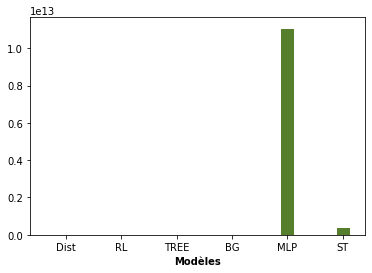

In [22]:
reg.resultat(modele, 10, 10)